<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_15_Neural_Network_Training%3A_Addressing_Overfitting_with_Regularization/Lecture_15_Neural_Network_Training__Addressing_Overfitting_with_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import necessary libraries for building and visualizing a neural network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # To generate a synthetic dataset
import seaborn as sns # For enhanced data visualization
from mlxtend.plotting import plot_decision_regions # To visualize the decision boundary of the model

import tensorflow # Deep learning library
from tensorflow.keras.models import Sequential # For building a sequential model
from tensorflow.keras.layers import Dense # For creating densely connected layers
from tensorflow.keras.layers import Dropout # For adding dropout regularization
from tensorflow.keras.optimizers import Adam # Adam optimizer for training

In [39]:
# Generate a synthetic dataset with a "moons" shape
# 100 data points, with some noise, and a fixed random state for reproducibility
x , y = make_moons(100, noise=0.2, random_state=2)

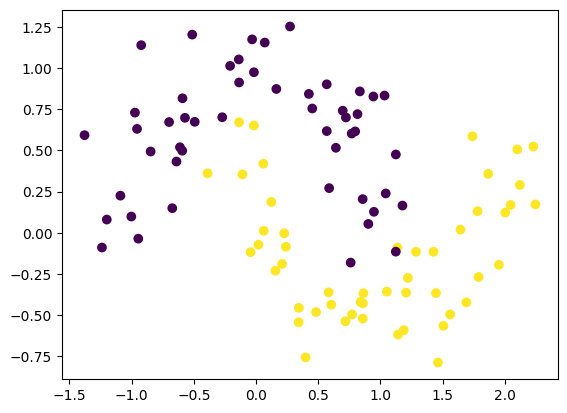

In [40]:
# Visualize the generated dataset
# Plot the data points, colored according to their class (y)
plt.scatter(x[:,0] , x[:,1], c=y)
plt.show() # Display the plot

In [41]:
# Build a simple sequential neural network model
model = Sequential()
# Add a dense layer with 128 units and ReLU activation. Input dimension is 2 for the 2 features in the dataset.
model.add(Dense(128, input_dim=2, activation='relu'))
# Add another dense layer with 128 units and ReLU activation.
model.add(Dense(128, activation='relu'))
# Add the output layer with 1 unit and sigmoid activation for binary classification.
model.add(Dense(1, activation='sigmoid'))
# Display the model summary, showing the layers and parameters.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Define the Adam optimizer with a learning rate of 0.01
adam=Adam(learning_rate=0.01)
# Compile the model
# Use binary crossentropy as the loss function for binary classification
# Use the Adam optimizer
# Track accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
# Train the model on the data
# Train for 200 epochs
# Use 20% of the data for validation
# Set verbose to 0 to suppress training output
history = model.fit(x, y, epochs=200, validation_split=0.2, verbose=0)

In [43]:
# Get the weights of the first layer of the trained model and check their shape
model.get_weights()[0].shape

(2, 128)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


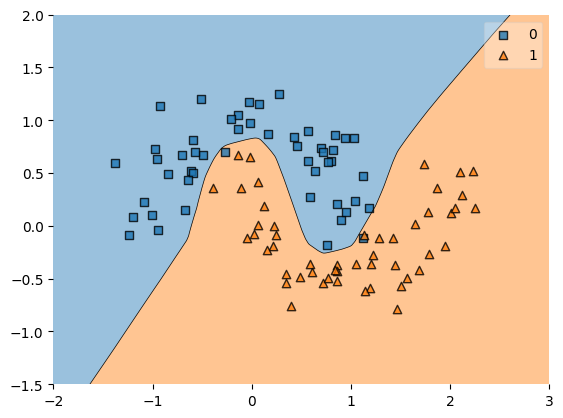

In [44]:
# Visualize the decision boundary of the trained model
# Use the plot_decision_regions function from mlxtend
plot_decision_regions(x, y, clf=model)
# Set the x and y limits of the plot for better visualization
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show() # Display the plot

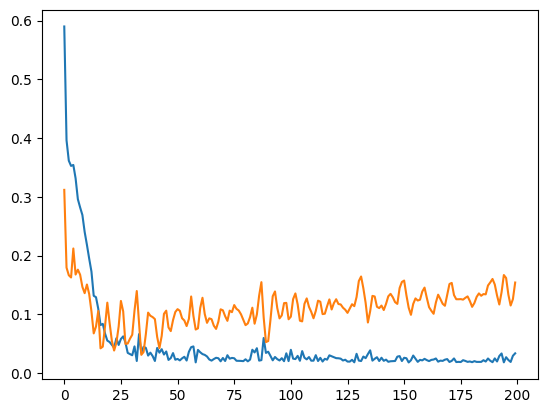

In [45]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss']) # Plot training loss
plt.plot(history.history['val_loss']) # Plot validation loss

# Regularization

In [46]:
# Build a second sequential neural network model with L2 regularization
model2 = Sequential()
# Add a dense layer with 128 units, ReLU activation, and L2 regularization with lambda=0.03
model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# Add another dense layer with 128 units, ReLU activation, and L2 regularization with lambda=0.03
model2.add(Dense(128, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# Add the output layer with 1 unit and sigmoid activation for binary classification.
model2.add(Dense(1, activation='sigmoid'))

# Display the summary of the second model
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Define the Adam optimizer with a learning rate of 0.01 (This is a repeat from the first model training)
adam=Adam(learning_rate=0.01)
# Compile the model (This is compiling the first model again, likely a mistake)
# Use binary crossentropy as the loss function for binary classification
# Use the Adam optimizer
# Track accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
# Train the model on the data (This is training the first model again, likely a mistake)
# Train for 200 epochs
# Use 20% of the data for validation
# Set verbose to 0 to suppress training output
history = model.fit(x, y, epochs=200, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


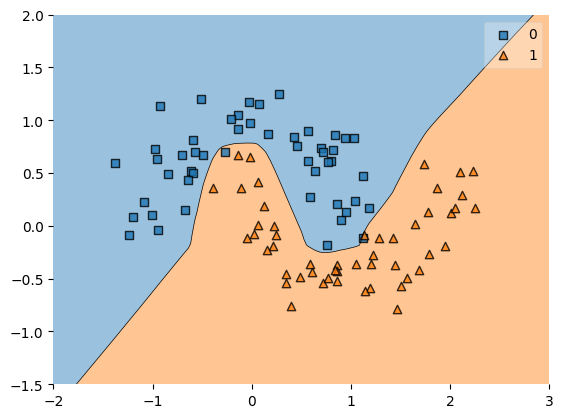

In [48]:
# Visualize the decision boundary of the trained model (This is visualizing the first model again)
# Use the plot_decision_regions function from mlxtend
plot_decision_regions(x, y, clf=model)
# Set the x and y limits of the plot for better visualization
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show() # Display the plot

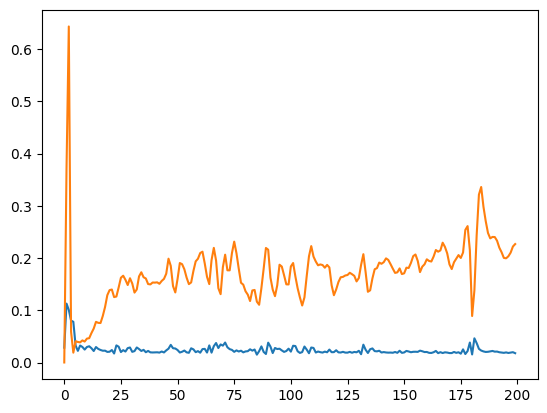

In [49]:
# Plot the training and validation loss over epochs (This is plotting the history of the first model again)
plt.plot(history.history['loss']) # Plot training loss
plt.plot(history.history['val_loss']) # Plot validation loss

In [50]:
# Get the weights of the first layer of the first model and reshape them into a 1D array
model_weight_layer1 = model.get_weights()[0].reshape(256)
# Get the weights of the first layer of the second model (with regularization) and reshape them into a 1D array
model_weight_layer2 = model2.get_weights()[0].reshape(256)

<Axes: >

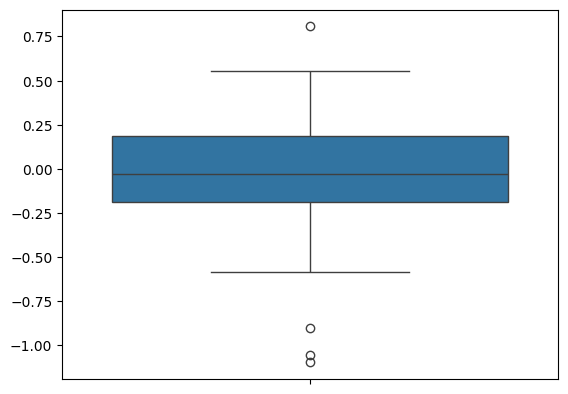

In [51]:
# Create a box plot of the weights from the first model's first layer
sns.boxplot(model_weight_layer1)

<Axes: >

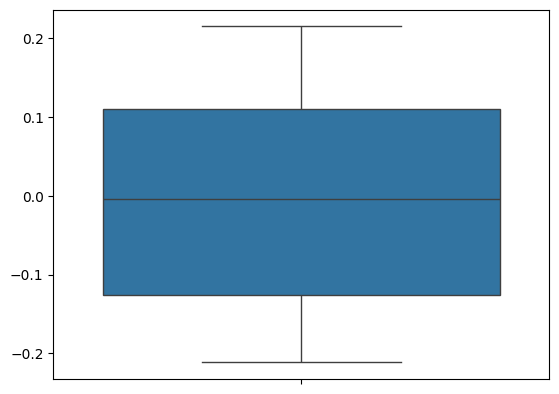

In [52]:
# Create a box plot of the weights from the second model's first layer (with regularization)
sns.boxplot(model_weight_layer2)

In [53]:
# Find the maximum weight value in the first model's first layer
model_weight_layer1.max()

np.float32(0.80741465)

In [54]:
# Find the maximum weight value in the second model's first layer (with regularization)
model_weight_layer2.max()

np.float32(0.21438374)

<ipython-input-55-4240952287>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer1) # Distribution of weights from the first model
<ipython-input-55-4240952287>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer2) # Distribution of weights from the second model (

<Axes: ylabel='Density'>

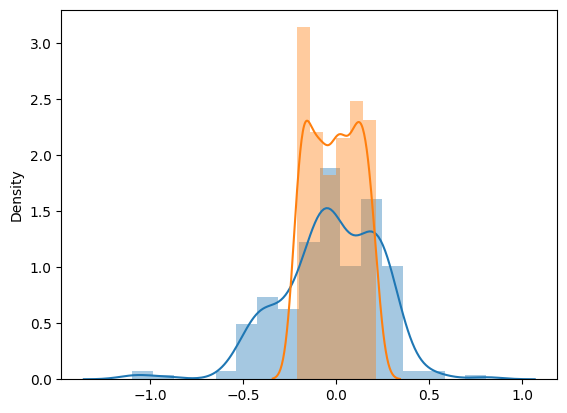

In [55]:
# Create distribution plots (histograms with kernel density estimate) of the weights
# Note: sns.distplot is deprecated, consider using sns.histplot or sns.displot
sns.distplot(model_weight_layer1) # Distribution of weights from the first model
sns.distplot(model_weight_layer2) # Distribution of weights from the second model (with regularization)